![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Projeto 2: Integração adaptativa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 0: Os métodos

Inclua abaixo os métodos de integração do retângulo, do trapézio, do ponto médio e de Simpson.

In [2]:
def retangulo(f, a, b, n=1000):
    """integral pelo método do retângulo da função vetorizada f"""
    x, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    
    return np.sum(f(x)) * h

def trapezio(f, a, b, n=1000):
    """integral pelo método do trapézio da função vetorizada f"""
    x, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)

    return (np.sum(f(x)) + (f(b) - f(a)) / 2) * h

def midpoint(f, a, b, n=1000):
    """integral pelo método do ponto médio da função vetorizada f"""
    x, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    mids = x + (h / 2)

    return np.sum(f(mids)) * h

def simpson(f, a, b, n=1000):
    """integral pelo método do ponto médio da função vetorizada f"""
    x, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    mids = x + (h / 2)

    return (4 * np.sum(f(mids)) + 2 * np.sum(f(x)) + (f(b) - f(a))) * (h/6)

In [3]:
methods = [retangulo, trapezio, midpoint, simpson]

In [4]:
exact = np.exp(2) - np.exp(0)
for method in methods:
    print(f"Erro usando {method.__name__:9s}: {method(np.exp, 0, 2) - exact: 7e}")

Erro usando retangulo: -6.386926e-03
Erro usando trapezio :  2.129685e-06
Erro usando midpoint : -1.064843e-06
Erro usando simpson  :  3.463896e-14


In [5]:
exact = np.exp(2) - np.exp(0)
tols = [1e-2, 4e-6, 2e-6, 1e-12]
for m, tol in zip(methods, tols):
    assert np.isclose(m(np.exp, 0, 2), exact, atol=tol)

# Parte 1: Integrais adaptativas

Uma das grandes dificuldades da integração numérica é saber
"quão pequenos devem ser os intervalos de integração".

Uma das respostas para esta questão é a seguinte:
"Até que reduzir mais ainda não faça tanta diferença".

Um método, por exemplo, aproxima a integral em $[a,b]$ com $N$ intervalos,
e depois, com $2N$ intervalos.

## Questão 1: Aumentando $N$

Para cada um dos métodos, faça um gráfico, mostrando, em função de $N$:
- o erro de $I_{N}$ até a integral exata
- o erro de $I_{2N}$ até a integral exata
- a diferença entre as integrais $I_N$ e $I_{2N}$.

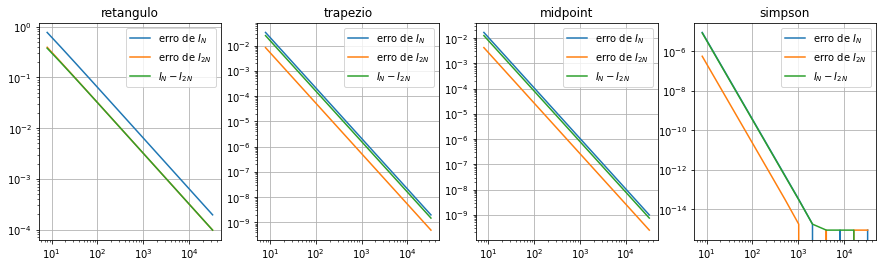

In [6]:
fig, axs = plt.subplots(ncols=4, figsize=(15,4))
Ns = 2**np.arange(3,16)
exact = np.exp(2) - np.exp(0)

for (ax,m) in zip(axs, methods):
    IN = np.array([m(np.exp, 0, 2, n=N) for N in Ns])
    I2N = np.array([m(np.exp, 0, 2, n=2*N) for N in Ns])
    diff =abs(IN - I2N)
    ax.loglog(Ns, abs(IN - exact), label="erro de $I_N$")
    ax.loglog(Ns, abs(I2N - exact), label="erro de $I_{2N}$")
    ax.loglog(Ns, diff, label="$I_N - I_{2N}$ ")
    ax.set_title(f"{m.__name__}")
    ax.legend()
    ax.grid()

O que você observa?

**Resposta:** Pode-se observar que o erro para subdivisões $2N$ são menores do que para $N$, independente do método aplicado.

Quantas subdivisões parecem ser necessárias para que o erro do método do trapézio cheguem em $10^{-14}$?

**Resposta:** Vemos pelo gŕafico abaixo que estão na ordem de $10^7$ o número de subdivisões para que o erro chegue em $10^{-14}$

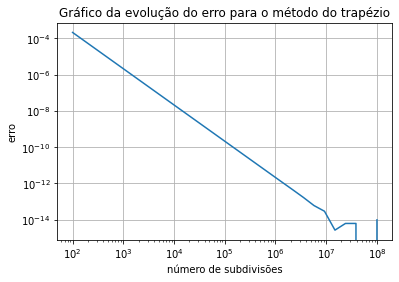

In [7]:
ns = np.floor(np.logspace(2,8,num = 30, base = 10))
ns = ns.astype(int)
trap_y = np.abs([trapezio(np.exp,0,2,n) - exact for n in ns])
plt.loglog(ns,trap_y);
plt.xlabel('número de subdivisões');
plt.ylabel('erro');
plt.title('Gráfico da evolução do erro para o método do trapézio');
plt.grid();

Agora, faça o mesmo estudo para uma outra função de sua escolha.

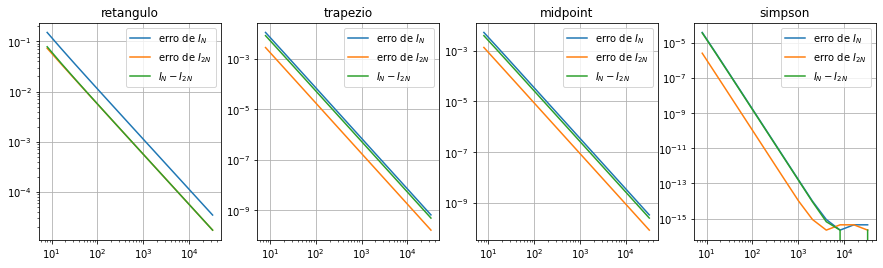

In [8]:
fig, axs = plt.subplots(ncols=4, figsize=(15,4))
Ns = 2**np.arange(3,16)
a,b = 1/8, 1/2 
def f(x):
  return 1/x
exact = np.log(1/2)- np.log(1/8) 

for (ax,m) in zip(axs, methods):
    IN = np.array([m(f, a,b , n=N) for N in Ns])
    I2N = np.array([m(f, a, b, n=2*N) for N in Ns])
    diff =abs(IN - I2N)
    ax.loglog(Ns, abs(IN - exact), label="erro de $I_N$")
    ax.loglog(Ns, abs(I2N - exact), label="erro de $I_{2N}$")
    ax.loglog(Ns, diff, label="$I_N - I_{2N}$ ")
    ax.set_title(f"{m.__name__}")
    ax.legend()
    ax.grid()

Explique a sua escolha.
Os resultados são similares ou diferentes?

**Resposta:** Escolhemos a função $f(x) = \frac{1}{x}$, pois possui uma integral analítica conhecida. Vimos que os resultados foram similares em relação ao último experimento.



## Questão 2: Dobrando Simpson

Agora, escreva um método `simpson2(f, a, b, tol)` que calcula a integral de $f$ no intervalo $[a,b]$,
dobrando o número de subdivisões, até que a diferença entre uma integral e a seguinte fique abaixo de  `tol`.

- Qual integral você acha melhor retornar?
  $I_N$ ou $I_{2N}$?
- Retorne, também, o número de subdivisões final.

In [9]:
def simpson2(f, a, b, tol=1e-8):
    """calcula a integral de f no intervalo [a,b], dobrando o número de subdivisões,
    até que a diferença entre uma integral e a seguinte fique abaixo de da 
    tolerância ´tol´. retorna a integral com maior subdivisões ´n´ e o próprio ´n´"""
    n = 0
    # Difrença entre uma integral e outra com o dobro de subdivisões
    simp1, simp2 = simpson(f, a, b, n=1), simpson(f, a, b, n=2)
    diff = simp1 - simp2
    # Verifica com quantas subdivisões a tolerância foi atingida
    while abs(diff) > tol:
      n += 1
      simp1, simp2 = simpson(f, a, b, n=2**n), simpson(f, a, b, n=2**(n+1))
      diff = simp1 - simp2
    
    return simp2, 2 ** (n + 1)
    

In [10]:
I, n = simpson2(np.exp, 0, 2)
assert np.isclose(I, np.exp(2) - 1)
assert n >= 64

In [11]:
I, n = simpson2(np.exp, 0, 2, tol=1)
assert n <= 8
assert np.isclose(I, np.exp(2) - 1, atol=1)
assert not np.isclose(I, np.exp(2) - 1)

In [12]:
I, n = simpson2(np.exp, 0, 2, tol=1e-14)
assert np.isclose(I, np.exp(2) - 1, atol=1e-14, rtol=1e-14)
assert n >= 64*32

Mas nem tudo é perfeito:
algumas funções podem "confundir" o dobrador:

In [13]:
def f(x): return np.sin(x)**2
simpson2(f, 0, 4*np.pi)

(1.0051486539434489e-30, 2)

Explique o que aconteceu.

**Resposta:** Todos os pontos que o método de Simpson usa para calcular a intgral cai em $f(x)=0$. Portanto a integral por Simpson deu zero com o erro da propria $f$


Como você faria para calcular essa integral com precisão?
Descreva sua ideia abaixo, e faça os cálculos em seguida.

**Resposta:** Dividiria o intervalo de integração, fazia a integral dessas partes separadamente e depois somaria as integrais das partes.

In [14]:
a, c, b = 0, 2 * np.pi, 4 * np.pi
print(f"Integral do primeiro subintervalo: {simpson2(f, a, c)[0]}; nº de subdivisões: {simpson2(f, a, c)[1]} ") 
print(f"Integral do segundo subintervalo:  {simpson2(f, c, b)[0]}; nº de subdivisões: {simpson2(f, c, b)[1]}")

solucao = tuple(map(np.sum, zip(simpson2(f, a, c), simpson2(f, c, b))))
print(f"Integral final:                    {solucao[0]}; nº de subdivisões: {solucao[1]}")

Integral do primeiro subintervalo: 3.141592653589793; nº de subdivisões: 8 
Integral do segundo subintervalo:  3.141592653589795; nº de subdivisões: 8
Integral final:                    6.283185307179588; nº de subdivisões: 16


Este mesmo método se aplica para calcular
$$ \int_0^{16\pi} \frac{\sin(x)^2}{\sqrt{1+x}} dx ? $$

Modifique o necessário para calcular essa integral!

In [15]:
def f2(x): return (np.sin(x) ** 2) / np.sqrt(1 + x)
a, b = 0, 16*np.pi
subdiv = np.linspace(a,b, num=9)
sol = tuple(map(np.sum, zip(*[simpson2(f2, subdiv[i], subdiv[i+1]) for i in range(len(subdiv)-1)])))
print(f"Integral do intervalo: {sol[0]}; nº de subdivisões: {sol[1]}")

Integral do intervalo: 6.117390358862394; nº de subdivisões: 832


O que ficou diferente
- para você?
- para o programa?

**Resposta:** Teve que lidar com mais intervalos de integração, calcular mais integrais e manipular melhor o array de resposta para dar a intergral do intervalo principal e a soma das subdivisões que cada método precisou. 

## Questão 3: Dobrando Simpson aos poucos

Se usarmos um intervalo de integração grande,
pode ser que a variação da função em uma parte seja bem menor do que em outra,
e daí seria mais importante "refinar" o método apenas na parte onde a função varia mais.

Para fazer isso, vamos usar uma abordagem **recursiva**:
1. calculamos a integral no intervalo $[a,b]$ com 1 e com 2 subdivisões
2. se ambas as integrais estiverem suficientemente próximas, terminamos:
    - retornamos a aproximação, e "2" para o número de subdivisões
3. senão, calculamos recursivamente a integral em $[a,m]$ e $[m,b]$,
    - e retornamos a soma das integrais, além da soma do número de subdivisões para cada metade.

Explique porque, ao calcular recursivamente, é importante dividir a tolerência por 2.

**Resposta:** A tolerância está associada ao intervalo todo. Quando eu faço subdivisões desse intervalo, eu preciso que a tolerancia diminua na mesma proporção, pois diminuindo os intervalos e mantendo a tolerância, o erro associado se acumula em cada recursão.

In [16]:
def simpson_rec(f, a, b, tol=1e-8):
    cache = [simpson(f,a,b,n = 1),simpson(f,a,b,n = 2)]
    diff = cache[0] - cache[1]
    if abs(diff) < tol:
      return cache[1], 2
    else:
      m = (a+b)/2
      I1, n1 = simpson_rec(f,a,m,tol = tol/2)
      I2, n2 = simpson_rec(f,m,b,tol = tol/2)
      return I1 + I2, n1 + n2

In [17]:
I, n = simpson_rec(np.exp, 0, 2)
assert np.isclose(I, np.exp(2) - np.exp(0))
assert n >= 64

In [18]:
I, n = simpson_rec(np.exp, 0, 2, tol=1e-12)
assert np.isclose(I, np.exp(2) - np.exp(0), atol=1e-12, rtol=1e-12)
assert n >= 512

Faça um gráfico que mostre o erro real em função da tolerância passada,
tanto para o método recursivo como para o método "dobrador".

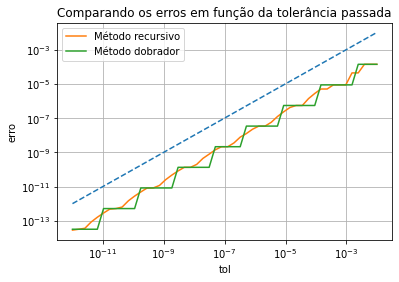

In [19]:
tols = np.logspace(-12,-2)
exact = np.exp(2) - np.exp(0)

plt.loglog(tols, tols, "--")
y_rec = np.abs([simpson_rec(np.exp,0,2,t)[0] - exact for t in tols])
y_2 = np.abs([simpson2(np.exp,0,2,t)[0] - exact for t in tols])
plt.loglog(tols,y_rec,label = 'Método recursivo')
plt.loglog(tols,y_2,label = 'Método dobrador')
plt.grid();
plt.legend();
plt.xlabel('tol');
plt.ylabel('erro');
plt.title('Comparando os erros em função da tolerância passada');
ax = plt.gca()

In [20]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 2

In [21]:
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Os métodos cumprem o que prometem?

YOUR ANSWER HERE

Agora, faça um gráfico do número de subdivisões utilizadas por cada método, em função da tolerância.

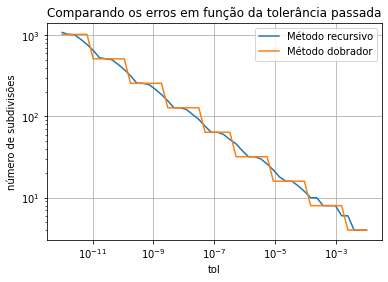

In [22]:
tols = np.logspace(-12,-2,)



y_rec = np.abs([simpson_rec(np.exp,0,2,t)[1] for t in tols])
y_2 = np.abs([simpson2(np.exp,0,2,t)[1]  for t in tols])
plt.loglog(tols,y_rec,label = 'Método recursivo')
plt.loglog(tols,y_2,label = 'Método dobrador')
plt.grid();
plt.legend();
plt.xlabel('tol');
plt.ylabel('número de subdivisões');
plt.title('Comparando os erros em função da tolerância passada');
ax = plt.gca()

In [23]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Repita ambos os gráficos, para outra função, em outro intervalo.

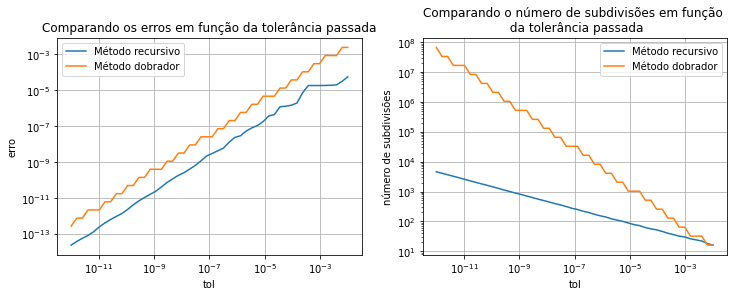

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))

tols = np.logspace(-12,-2)

s = 0,3
def f(x):
  return np.sqrt(x)
exact2 = 2/3*3**(3/2)


y_rec = np.abs([simpson_rec(f,s[0],s[1],t)[0] - exact2 for t in tols])
y_2 = np.abs([simpson2(f,s[0],s[1],t)[0] - exact2 for t in tols])
ax1.loglog(tols,y_rec,label = 'Método recursivo')
ax1.loglog(tols,y_2,label = 'Método dobrador')
ax1.grid();
ax1.legend();
ax1.set_xlabel('tol');
ax1.set_ylabel('erro');
ax1.set_title('Comparando os erros em função da tolerância passada');

y_nrec = np.abs([simpson_rec(f,s[0],s[1],t)[1] for t in tols])
y_n2 = np.abs([simpson2(f,s[0],s[1],t)[1]  for t in tols])
ax2.loglog(tols,y_nrec,label = 'Método recursivo')
ax2.loglog(tols,y_n2,label = 'Método dobrador')
ax2.grid();
ax2.legend();
ax2.set_xlabel('tol');
ax2.set_ylabel('número de subdivisões');
ax2.set_title('Comparando o número de subdivisões em função \n da tolerância passada');



Estes métodos parecem equivalentes ou não?

**Resposta:** A idéia dos dois métodos é a mesma, porém o método recursivo é mais otimizado,pois ele poupa o número de subdivisões, enquanto que o dobrador vai sempre dobrando o número total de intervalos a cada iteração.

# Parte 2: Funções pseudo-periódicas

Vamos continuar combinando inteligência computacional e humana.
Aqui, vamos usar nosso conhecimento de uma função para usar os métodos de integração "após umas contas".

## Questão 4: Mudança de variáveis

A função $g(x) = \sin(x^2)$ não é periódica, mas tem uma componente oscilatória importante.
Dê a função $h(u)$, que corresponde ao integrando de uma mudança de variáveis tal que
$$ \int_a^b g(x) \, dx = \int_{a^2}^{b^2} h(u) \, du.$$

In [25]:
def g(x):
    return np.sin(x**2)

In [26]:
def h(y):
    return np.sin(y)/(2*np.sqrt(y))

In [27]:
assert np.abs(h(np.pi)) < 1e-15

Faça um gráfico de $h$, no intervalo $[1, 20]$.

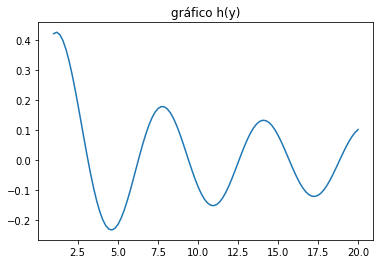

In [28]:
ls = np.linspace(1,20, num=100)
plt.plot(ls, h(ls))
plt.title("gráfico h(y)")
ax = plt.gca()

In [29]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

In [30]:
l = ax.lines[0]
assert min(l.get_xdata()) == 1
assert max(l.get_xdata()) == 20

## Questão 5: Erros de integração

Vamos observar como os métodos de integração se comportam quando integramos $g$ ou $h$.
Para isso, vamos precisar de um integrador (numérico!) suficientemente preciso.
Por simplicidade, vamos integrar a função $g$.

In [83]:
def G(a,b):
    y = simpson(g, a,b, n=100000);
    return y

In [84]:
assert np.isclose(G(1,2),    0.49450818762037513)
assert np.isclose(G(20,33), -0.006737045607890843)

Calcule a integral de $g$ no intervalo $[1,2]$ e a correspondente integral de $h$ em $[1,4]$,
para a tolerância padrão `1e-8`,
usando algum dos métodos adaptativos que vimos.

Qual o erro de cada um dos métodos?
Em quantos pontos cada um calcula?

In [71]:
y1 = simpson2(g, 1, 2);
y2 = simpson2(h, 1, 4);
print(f"Erro para g em [1,2]: {abs(y1[0]- G(1,2))}, pontos: {y1[1]}")
print(f"Erro para h em [1,4]: {abs(y2[0]- G(1,2))}, pontos: {y2[1]}")

Erro para g em [1,2]: 9.62617208166705e-11, pontos: 128
Erro para h em [1,4]: 1.7566320620332476e-10, pontos: 64


O que acontece se pedirmos mais precisão? E menos?

In [72]:
y1 = simpson2(g, 1, 2, tol=1e-9);
y2 = simpson2(h, 1, 4,tol=1e-9);
print("Com mais precisão:")
print(f"Erro para g em [1,2]: {abs(y1[0]- G(1,2))}, pontos: {y1[1]}")
print(f"Erro para h em [1,4]: {abs(y2[0]- G(1,2))}, pontos: {y2[1]}\n")
y1 = simpson2(g, 1, 2, tol=1e-7);
y2 = simpson2(h, 1, 4,tol=1e-7);
print("Com menos precisão:")
print(f"Erro para g em [1,2]: {abs(y1[0]- G(1,2))}, pontos: {y1[1]}")
print(f"Erro para h em [1,4]: {abs(y2[0]- G(1,2))}, pontos: {y2[1]}\n")

Com mais precisão:
Erro para g em [1,2]: 6.0163540815949546e-12, pontos: 256
Erro para h em [1,4]: 1.098682256284178e-11, pontos: 128

Com menos precisão:
Erro para g em [1,2]: 1.540364447105702e-09, pontos: 64
Erro para h em [1,4]: 2.802464482698497e-09, pontos: 32



Quais diferenças você observa entre integrar $g$ ou $h$?

**RESPOSTA:** As diferenças são que, usando h, o erro é maior e o número de pontos usados são metade para uma mesma tolerância em comparação com g.

## Questão 6: Explorando os períodos

Agora, vamos integrar num intervalo que corresponde a um "período" de $g$:
$[\sqrt{\pi}, \sqrt{2\pi}]$.

Repita os estudos feitos na questão anterior.

In [73]:
spi  = np.sqrt(np.pi)
s2pi = np.sqrt(2*np.pi) # para ficar mais legível

y1 = simpson2(g, spi, s2pi);
y2 = simpson2(h, (spi**2), (s2pi**2));
print(f"Erro para g em [1,2]: {abs(y1[0]- G(spi,s2pi))}, pontos: {y1[1]}")
print(f"Erro para h em [1,4]: {abs(y2[0]- G(spi,s2pi))}, pontos: {y2[1]}\n")
y1 = simpson2(g, spi, s2pi, tol=1e-9);
y2 = simpson2(h, (spi**2), (s2pi**2),tol=1e-9);
print("Com mais precisão (1e-9):")
print(f"Erro para g em [1,2]: {abs(y1[0]- G(spi,s2pi))}, pontos: {y1[1]}")
print(f"Erro para h em [1,4]: {abs(y2[0]- G(spi,s2pi))}, pontos: {y2[1]}\n")
y1 = simpson2(g, spi, s2pi, tol=1e-7);
y2 = simpson2(h, (spi**2), (s2pi**2),tol=1e-7);
print("Com menos precisão (1e-7):")
print(f"Erro para g em [1,2]: {abs(y1[0]- G(spi,s2pi))}, pontos: {y1[1]}")
print(f"Erro para h em [1,4]: {abs(y2[0]- G(spi,s2pi))}, pontos: {y2[1]}\n")

Erro para g em [1,2]: 6.40926756112492e-11, pontos: 128
Erro para h em [1,4]: 5.114209056245045e-11, pontos: 128

Com mais precisão (1e-9):
Erro para g em [1,2]: 6.40926756112492e-11, pontos: 128
Erro para h em [1,4]: 5.114209056245045e-11, pontos: 128

Com menos precisão (1e-7):
Erro para g em [1,2]: 1.0255380988866136e-09, pontos: 64
Erro para h em [1,4]: 8.18310363914776e-10, pontos: 64



Neste caso, há mais ou menos diferença entre os métodos?

**RESPOSTA:** Há menos diferenças, o número de pontos usados são iguais nos dois métodos, apesar do erro ser diferente.

Para lidar com os zeros periódicos de $h$,
escreva a função `multiint(f, intervals, tol)`, que retorna:
- a soma das integrais de $f$ em cada um dos intervalos
  (uma lista de pares, com as extremidades iniciais e finais);
- bem como o número total de subdivisões efetuadas.

Lembre de dividir a tolerância pelo número de intervalos, ao chamar o integrador em cada um deles ;-)

In [75]:
def multiint(f, intervals, tol=1e-8):
    n = len(intervals)
    tol = tol/n
    y = 0
    ns = 0
    for inter in intervals:
        z = simpson2(f, inter[0], inter[1], tol=tol)
        y += z[0]
        ns +=z[1]
    return y, ns

In [76]:
I = multiint(np.sin, [(0, np.pi), (2*np.pi, 3*np.pi), (4*np.pi, 5*np.pi)])
assert np.isclose(I[0], 6, atol=1e-8, rtol=1e-8)
assert I[1] > 3*32

In [77]:
I = multiint(np.sin, [(0, np.pi), (np.pi, 2*np.pi), (2*np.pi, 8)])
assert np.isclose(I[0], 1 - np.cos(8), atol=1e-8, rtol=1e-8)
assert I[1] > 100

Agora, estude como os erros de integral de $g$ e $h$ se comportam,
para intervalos com mais "períodos".

In [78]:
i1  = [(np.sqrt(np.pi), np.sqrt(2*np.pi)), (np.sqrt(3*np.pi),np.sqrt(4*np.pi)), (np.sqrt(5*np.pi), np.sqrt(6*np.pi))]
i2 = np.power(i1,2)
I1 = multiint(g, i1)
I2 = multiint(h, i2)
print(f"Erro usando g:{abs(I1[0]- G(np.sqrt(np.pi),np.sqrt(6*np.pi)))}, pontos: {I1[1]}")
print(f"Erro usando h:{abs(I2[0]- G(np.sqrt(np.pi),np.sqrt(6*np.pi)))}, pontos: {I2[1]}")


Erro usando g:0.6240468851735732, pontos: 384
Erro usando h:0.6240468851590948, pontos: 384


Comente o comportamento dos dois métodos para esta nova situação.
O que você percebe?

**RESPOSTA:** O número de pontos usados é o mesmo para ambos casos, o erro, no entanto, é menor usando h. Embora h agora tenham vantagem sobre g, o erro é muito grande

## Questão 7: Mantendo o integrando positivo

A função que estamos integrando é bastante oscilatória.
Após a mudança de variáveis, é possível somar a parte positiva com a negativa seguinte (ou vice-versa),
e reduzir a amplitude do integrando.

Faça um gráfico de $h$ e de $j(u) = h(u) + h(u + \pi)$ no intervalo $[1,20]$.

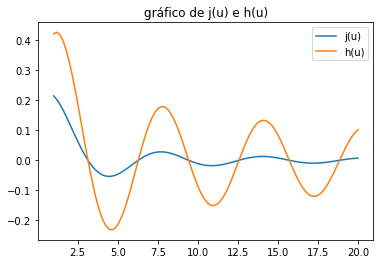

In [79]:
j = lambda x: h(x) + h(x + np.pi)

ns = np.linspace(1,20, num= 100)
plt.plot(ns, j(ns), label="j(u)")
plt.plot(ns, h(ns), label="h(u)")
plt.legend()
plt.title("gráfico de j(u) e h(u)")
ax = plt.gca()

In [80]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""

In [81]:
l = ax.lines[0]
assert min(l.get_xdata()) == 1
assert max(l.get_xdata()) == 20

Faça, também, gráficos separados no intervalo $[6\pi,60\pi]$ para $h$ e $j$.

Text(0.5, 1.0, 'h(u)')

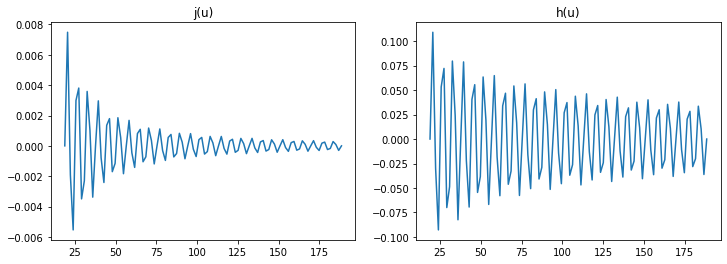

In [82]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
(ax1, ax2) = axs

ns = np.linspace(6*np.pi,60*np.pi, num= 100)
ax1.plot(ns, j(ns))
ax1.set_title("j(u)")
ax2.plot(ns, h(ns))
ax2.set_title("h(u)")

In [64]:
for ax in axs:
    assert len(ax.lines) == 1
    assert ax.title.get_text() != ""

O que você nota do comportamento de $h$ e $j$?

Agora, compare integrar
- $g$ no intervalo $[\sqrt{6\pi}, \sqrt{30\pi}]$,
- $h$ no intervalo $[6\pi, 30\pi]$,
- $j$ nos intervalos correspondentes

Para isto, calcule os erros e números de subdivisões usados para vários valores da tolerância,
e faça um gráfico do erro em função do número de subdivisões.

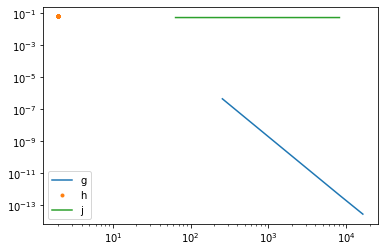

In [92]:
a, b = np.sqrt(6*np.pi), np.sqrt(30*np.pi)
I = G(a,b)
tols = np.logspace(-12,-4)
z1, z2, z3 = [],[],[]
for tol in tols:
    z1.append(simpson2(g, a, b, tol))
    z2.append(simpson2(h, 6*np.pi, 30*np.pi, tol))
    z3.append(simpson2(j, 6*np.pi, 29*np.pi, tol))
plt.loglog([z[1] for z in z1], [abs(z[0] - I) for z in z1], label="g")
plt.loglog([z[1] for z in z2], [abs(z[0] - I) for z in z2],".", label="h")
plt.loglog([z[1] for z in z3], [abs(z[0] - I) for z in z3], label="j")
plt.legend()
ax = plt.gca()

In [46]:
assert len(ax.lines) == 3

O que você observa agora?
A comparação do número de subdivisões é justa entre $h$ e $j$?

g(x) tem erros muito menores, e os números de subdivisões maiores em relação aos outros. Não é justa porque ambas retornam o mesmo valor, portanto têm o mesmo erro, independente da tolerância passada, no entanto, j usa valores cada vez maiores de subdivisões, diferente de h, só 2 para todas tolerâncias.



Qual método você escolheria para estimar a integral de 0 a infinito de $g$?
Porquê?

**RESPOSTA:** Escolheria usando a função g(u), pois pelo gráfico podemos ver que ela tem muito menos erro, vantagem ao fazer uma soma de intervalos até o infinito, o que seriam muitos intervalos, cada um com um erro, logo a soma de todos erros de cada intervalo até o infinito seria muito menor que nas outras.